Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.3  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **4. studenog 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

[ 1.   0.8  1.4  0.4 -0.6 -0.8 -1.2]
[1 1 1 1 0 0 0]
1.0


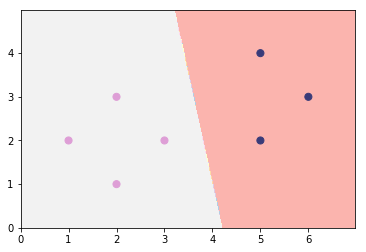

In [4]:
ridge = RidgeClassifier(alpha = 0).fit(seven_X, seven_y)
print(ridge.decision_function(seven_X))
print(ridge.predict(seven_X))
print(accuracy_score(ridge.predict(seven_X), seven_y))
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=ridge.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

1.0


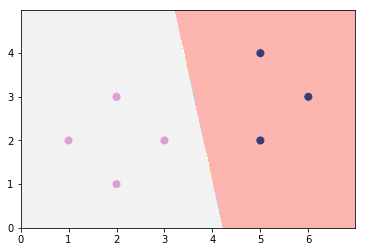

In [5]:
linear = LinearRegression().fit(seven_X, seven_y)
print(accuracy_score(ridge.predict(seven_X) >= 0.5, seven_y))
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x : linear.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

0.875


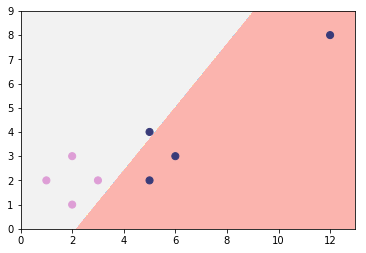

In [7]:
linear = LinearRegression().fit(outlier_X, outlier_y)
print(accuracy_score(linear.predict(outlier_X) >= 0.5, outlier_y))
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x : linear.predict(x) >= 0.5)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

0.875


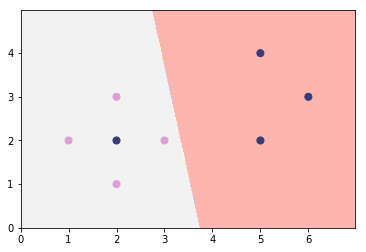

In [9]:
linear = LinearRegression().fit(unsep_X, unsep_y)
print(accuracy_score(ridge.predict(unsep_X) >= 0.5, unsep_y))
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, h=lambda x : linear.predict(x) >= 0.5)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [10]:
from sklearn.datasets import make_classification

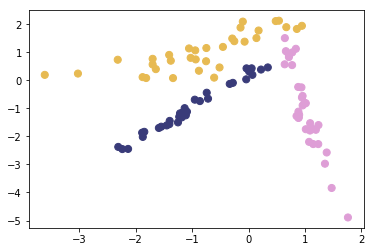

In [11]:
classification_X, classification_y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                                                         n_classes=3, n_clusters_per_class=1)
mlutils.plot_2d_clf_problem(classification_X, classification_y)
#print(classification_X, classification_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

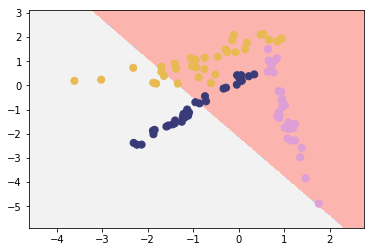

In [12]:
y1 = [y*1 for y in classification_y == 0]
#print(np.array(y1))
#klasa 0 - plavi
h1 = LinearRegression().fit(classification_X, np.array(y1))
mlutils.plot_2d_clf_problem(classification_X, classification_y, h=lambda x : h1.predict(x) >= 0.5)

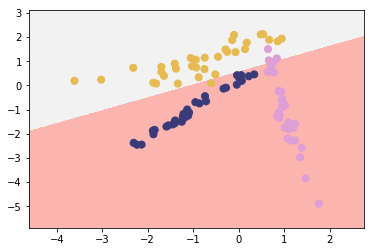

In [13]:
y2 = [y*1 for y in classification_y == 1]
#klasa 1 - zuti
h2 = LinearRegression().fit(classification_X, np.array(y2))
mlutils.plot_2d_clf_problem(classification_X, classification_y, h=lambda x : h2.predict(x) >= 0.5)

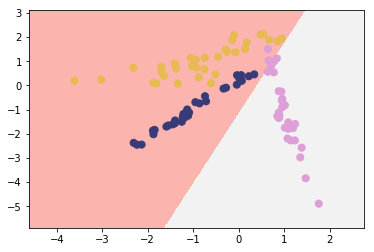

In [14]:
y3 = [y*1 for y in classification_y == 2]
#klasa 2 - rozi
h3 = LinearRegression().fit(classification_X, np.array(y3))    
mlutils.plot_2d_clf_problem(classification_X, classification_y, h=lambda x: h3.predict(x) >= 0.5)

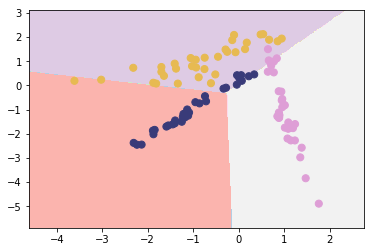

In [15]:
def predict(x):
    h1predict = h1.predict([x])
    h2predict = h2.predict([x])
    h3predict = h3.predict([x])
    
    maximum = max(h1predict, h2predict, h3predict)
    if maximum == h1predict:
        return 0
    if maximum == h2predict:
        return 1
    if maximum == h3predict:
        return 2
        
#print(hx)
mlutils.plot_2d_clf_problem(classification_X, classification_y, h=lambda x: predict(x))

[0 2 2 1 0 0 1 2 0 0 1 0 0 2 1 1 2 2 1 1 1 2 0 1 1 2 0 0 1 2 1 0 2 1 2 0 1
 0 2 2 1 1 2 1 0 1 2 1 0 1 0 1 0 1 1 1 1 1 2 1 1 0 2 1 0 0 1 0 0 0 2 1 2 1
 2 2 1 1 1 2 2 2 0 2 1 2 2 2 1 1 0 1 2 0 1 1 2 1 2 1]


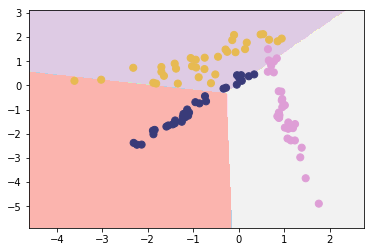

In [16]:
ridgeClass = RidgeClassifier().fit(classification_X, classification_y)
print(ridgeClass.predict(classification_X))
mlutils.plot_2d_clf_problem(classification_X, classification_y, h=ridgeClass.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

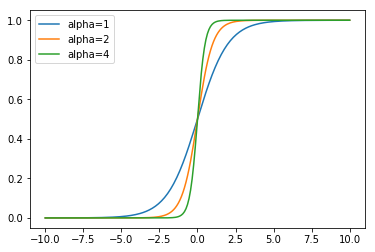

In [17]:
def sigm(x, alpha):
    return 1/(1+exp(-alpha*x))
for alpha in (1, 2, 4):
    X = []
    Y = []
    for x in np.linspace(-10, 10, 200):
        Y.append(sigm(x, alpha))
        X.append(x)
    plt.plot(X, Y, label='alpha={}'.format(alpha))
plt.legend()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [18]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x, w):
    fi = PolynomialFeatures(1).fit_transform([x])
    wx = dot(w.transpose(),fi[0])
    return sigm(wx, 1)

def cross_entropy_error(X, y, w): 
    suma = 0
    for i, x in enumerate(X):
        h = lr_h(x, w)
        suma += -y[i]*np.log(h) - (1-y[i])*np.log(1-h)
    return suma/len(y)


In [19]:
def lr_train(X, y, eta=0.01, max_iter=2000, trace=False, alpha=0, epsilon=0.000001):
    w = np.zeros(len(X[0])+1)
    eta = eta
    trace_m = []
    trace_m.append(w.copy())
    Y = y.copy()
    Y[Y==-1]=0
    for i in range(max_iter):
        last_error = cross_entropy_error(X, Y, w)
        L_grad = [0] * len(w)
        for i in range(len(X)):
            h = lr_h(X[i], w)
            L_grad += (h - Y[i]) * PolynomialFeatures(1).fit_transform(X)[i]
        w[0] -= eta*L_grad[0]
        w[1:] -= (w[1:]*eta*alpha + eta*L_grad[1:])
        new_error = cross_entropy_error(X, Y, w)
        if (trace):
            trace_m.append(w.copy())
        if (abs(new_error - last_error) < epsilon):
            break
    if (trace):
        return w, trace_m
    else:
        return w


#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

[ 6.44150959 -2.11012128  0.53522851]
Cross Entropy error = 0.07751718252492557


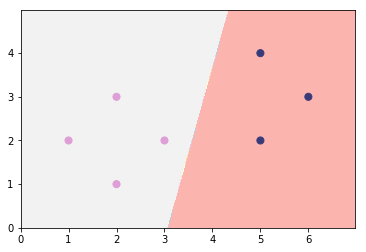

In [20]:
w = lr_train(seven_X, seven_y)
print(w)
print("Cross Entropy error = {}".format(cross_entropy_error(seven_X, seven_y, w)))

mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x :lr_h(x, w) >= 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

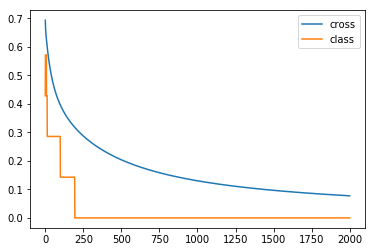

In [21]:
def class_error(X, y, w):
    suma = 0
    for i, x in enumerate(X):
        h = lr_h(x, w)
        if h >= 0.5:
            h = 1
        else: 
            h = 0
        if y[i] == h: continue
        suma+=1
    return suma/len(X)
            

w, trace = lr_train(seven_X, seven_y, trace=True)

cross_error = []
classification_error = []
for w in trace:
    cross_error.append(cross_entropy_error(seven_X, seven_y, w))
    classification_error.append(class_error(seven_X, seven_y, w))
    
plt.plot(range(len(trace)), cross_error, label="cross")
plt.plot(range(len(trace)), classification_error, label="class")
plt.legend()

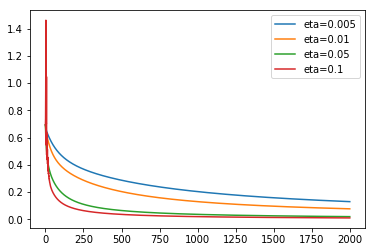

In [22]:
for eta in (0.005,0.01,0.05,0.1):
    cross_error = []
    w, trace = lr_train(seven_X, seven_y, trace=True, eta=eta)
    for w in trace:
        cross_error.append(cross_entropy_error(seven_X, seven_y, w))
    plt.plot(range(len(trace)), cross_error, label="eta={}".format(eta))
plt.legend()
    


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [23]:
from sklearn.linear_model import LogisticRegression

[5.33140685]
[[-1.18244863 -0.30256113]]


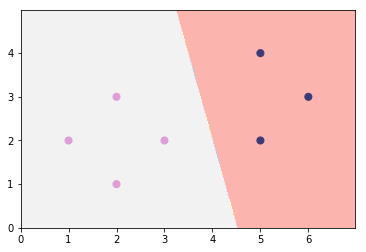

In [24]:
lg = LogisticRegression(max_iter=2000, tol=0.000001, solver='lbfgs').fit(seven_X, seven_y)
print(lg.intercept_)
print(lg.coef_)
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x: lg.predict(x))

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

[5.33161555]
[[-1.18248527 -0.30259653]]


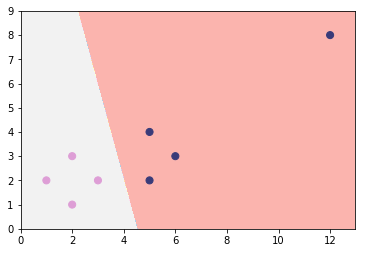

In [25]:
lg = LogisticRegression(max_iter=2000, tol=0.000001, solver='lbfgs').fit(outlier_X, outlier_y)
print(lg.intercept_)
print(lg.coef_)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x: lg.predict(x))

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


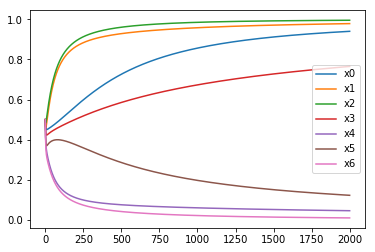

In [26]:
w, trace = lr_train(seven_X, seven_y, trace=True)
h = [[], [], [], [], [], [], []]
for w in trace:
    for i in range(7):
        h[i].append(lr_h(seven_X[i], w))
for i in range(7):
    plt.plot(range(len(trace)), h[i], label='x{}'.format(i))
plt.legend()

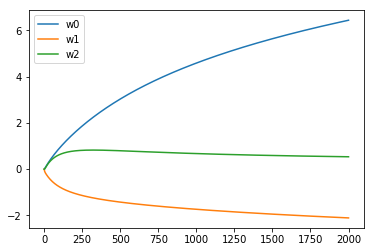

In [27]:
w, trace = lr_train(seven_X, seven_y, trace=True)
wi = [[], [], []]
for w in trace:
    wi[0].append(w[0])
    wi[1].append(w[1])
    wi[2].append(w[2])
for i in range(3):
    plt.plot(range(len(trace)), wi[i], label='w{}'.format(i))
plt.legend()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

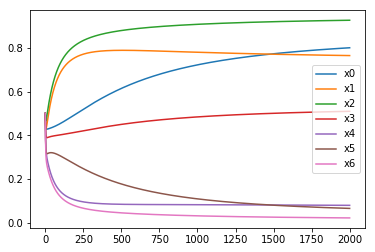

In [28]:
w, trace = lr_train(unsep_X, unsep_y, trace=True)
h = [[], [], [], [], [], [], []]
for w in trace:
    for i in range(7):
        h[i].append(lr_h(unsep_X[i], w))
for i in range(7):
    plt.plot(range(len(trace)), h[i], label='x{}'.format(i))
plt.legend()

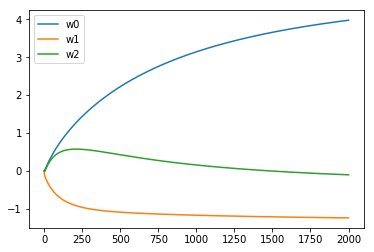

In [29]:
w, trace = lr_train(unsep_X, unsep_y, trace=True)
wi = [[], [], []]
for w in trace:
    wi[0].append(w[0])
    wi[1].append(w[1])
    wi[2].append(w[2])
for i in range(3):
    plt.plot(range(len(trace)), wi[i], label='w{}'.format(i))
plt.legend()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [30]:
from numpy.linalg import norm

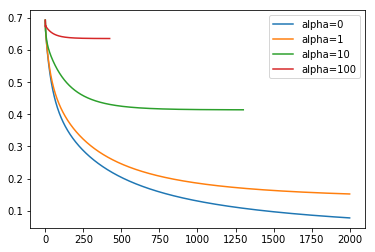

In [31]:
for alpha in (0,1,10,100):
    w, trace = lr_train(seven_X, seven_y, trace=True, alpha=alpha)
    error = []
    for w in trace:
        error.append(cross_entropy_error(seven_X, seven_y, w))
    plt.plot(range(len(trace)), error, label="alpha={}".format(alpha))
plt.legend()

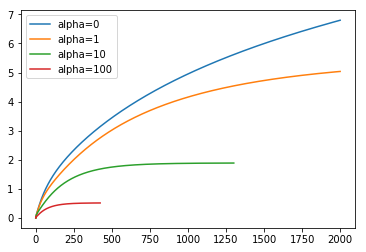

In [32]:
def l2norma(w):
    w2 = matmul(w.transpose(), w)
    #L2_1 = []
    #for s in w2:
    #    L2_1.append(s[0])
    return pow(np.array(w2), 1/2)

norme=[[], [], [], []]
for i, alpha in enumerate([0,1,10,100]):
    w, trace = lr_train(seven_X, seven_y, trace=True, alpha=alpha)
    for w in trace:
        norme[i].append(l2norma(w))
    plt.plot(range(len(trace)), norme[i], label="alpha={}".format(alpha))
plt.legend()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

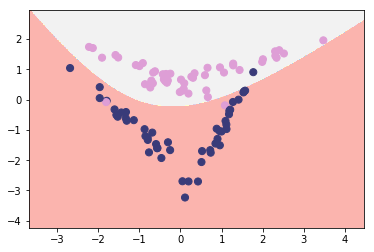

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

classX, classY = make_classification(n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
poly = PolynomialFeatures(2)
fi2 = poly.fit_transform(classX)
lrmodel = LogisticRegression(solver='lbfgs').fit(fi2, classY)

#poly = PolynomialFeatures(2)
#...
mlutils.plot_2d_clf_problem(classX, classY, lambda x : lrmodel.predict(poly.transform(x)))

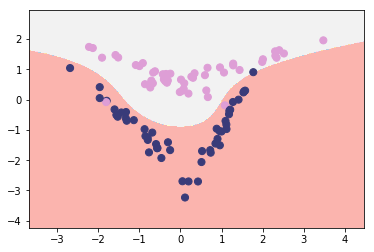

In [34]:
# Vaš kôd ovdje
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

#classX, classY = make_classification(n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
poly = PolynomialFeatures(3)
fi3 = poly.fit_transform(classX)
lrmodel = LogisticRegression(solver='lbfgs').fit(fi3, classY)

#poly = PolynomialFeatures(2)
#...
mlutils.plot_2d_clf_problem(classX, classY, lambda x : lrmodel.predict(poly.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?